In [1]:
import pandas as pd

In [10]:
ted_main_df = pd.read_csv('ted_main.csv')
transcripts_df = pd.read_csv('transcripts.csv')

các vấn đề về dữ liệu
- Cột speaker_occupation cógiá trị bị thiếu
- transcripts.csv**: Có dòng trùng lặp hoàn toàn.
- chuyển các code date về đúng định dạng datetime



In [18]:
transcripts_df = transcripts_df.drop_duplicates() # Remove duplicates
transcripts_df = transcripts_df.dropna(how="all") # Remove rows with NaN values
ted_main_df["speaker_occupation"] = ted_main_df["speaker_occupation"].fillna("Unknown")
ted_main_df["film_date"] = pd.to_datetime(ted_main_df["film_date"], unit='s')
ted_main_df["published_date"] = pd.to_datetime(ted_main_df["published_date"], unit='s')



In [19]:
ted_main_df["speaker_occupation"] = ted_main_df["speaker_occupation"].fillna("Unknown")


1. Top 10 speaker nổi tiếng nhiều view nhất

In [20]:
top_speakers = ted_main_csv.groupby("main_speaker")["views"].sum().sort_values(ascending=False).head(10)
print(top_speakers)

main_speaker
Ken Robinson         63006281
Amy Cuddy            43155405
Simon Sinek          41113370
Brené Brown          39157044
Julian Treasure      30927659
Hans Rosling         27567127
James Veitch         26187805
Mary Roach           22270883
Dan Gilbert          21796454
Jill Bolte Taylor    21190883
Name: views, dtype: int64


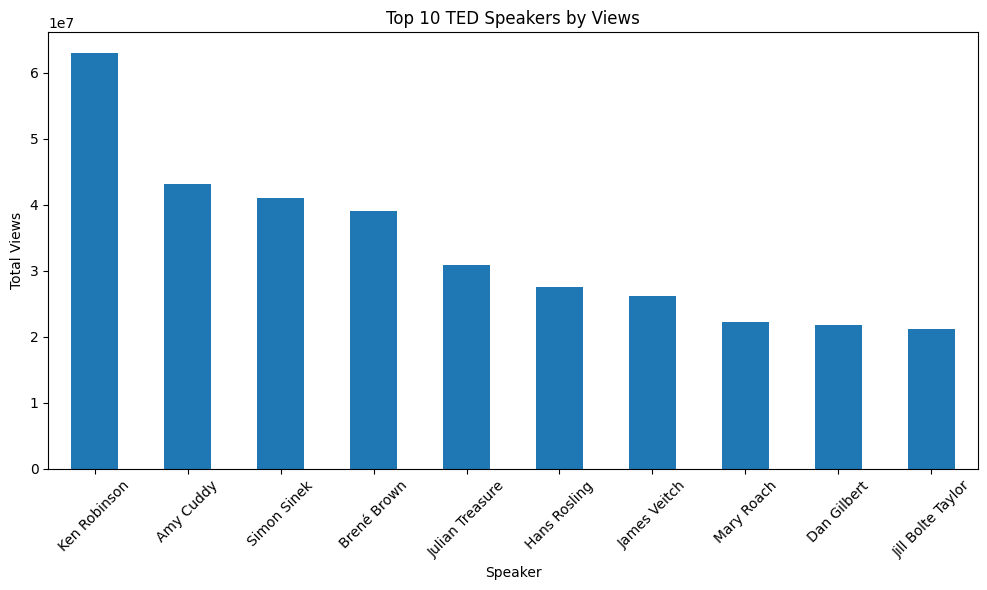

In [22]:
import matplotlib.pyplot as plt
top_speakers.plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 TED Speakers by Views")
plt.xlabel("Speaker")  
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Câu 2: Các chủ đề được quan tâm nhất là

In [41]:
import ast
from collections import Counter

all_tags = ted_main_df["tags"].apply(ast.literal_eval) # chuyển toàn bộ các chuỗi thành danh sách
tag_counts = Counter(tag for tags in all_tags for tag in tags)
tag_counts.most_common(5)




[('technology', 727),
 ('science', 567),
 ('global issues', 501),
 ('culture', 486),
 ('TEDx', 450)]

3. Lượng người xem thay đổi như thế nào theo thời gian?


<Axes: title={'center': 'Lượt xem trung bình theo năm'}, xlabel='published_year'>

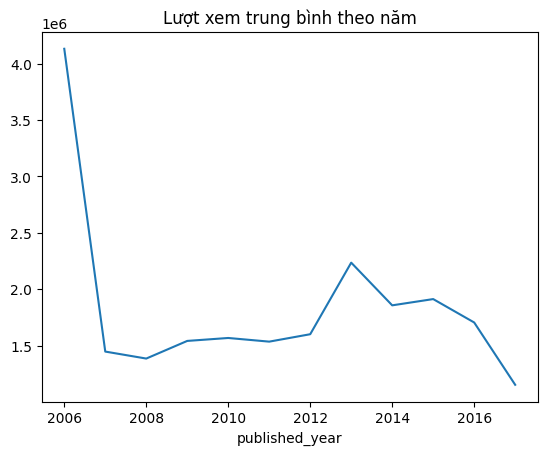

In [36]:
ted_main_df["published_year"] = pd.to_datetime(ted_main_df["published_date"], unit='s').dt.year
yearly_views = ted_main_df.groupby("published_year")["views"].mean()
yearly_views.plot(title="Lượt xem trung bình theo năm")


4. Những bài viết có view, comment cao nhất

In [ ]:
ted_main_df["engagement_score"] = ted_main_df["views"] + ted_main_df["comments"] * 100
ted_main_df.nlargest(5, "engagement_score")[["title", "main_speaker", "views", "comments"]]
#Phương thức nlargest() sắp xếp DataFrame theo cột được chỉ định và chỉ giữ lại số lượng hàng hàng đầu được yêu cầu (trong trường hợp này là 5 hàng).
# Cải tiến: Đưa thêm thuật toán về mechine learning để đánh trọng số chính xác hơn.

,title,main_speaker,views,comments
0,Do schools kill creativity?,Ken Robinson,47227110,4553
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
677,How great leaders inspire action,Simon Sinek,34309432,1930
837,The power of vulnerability,Brené Brown,31168150,1927
452,10 things you didn't know about orgasm,Mary Roach,22270883,354


5. Những tag đang phổ biến nhất

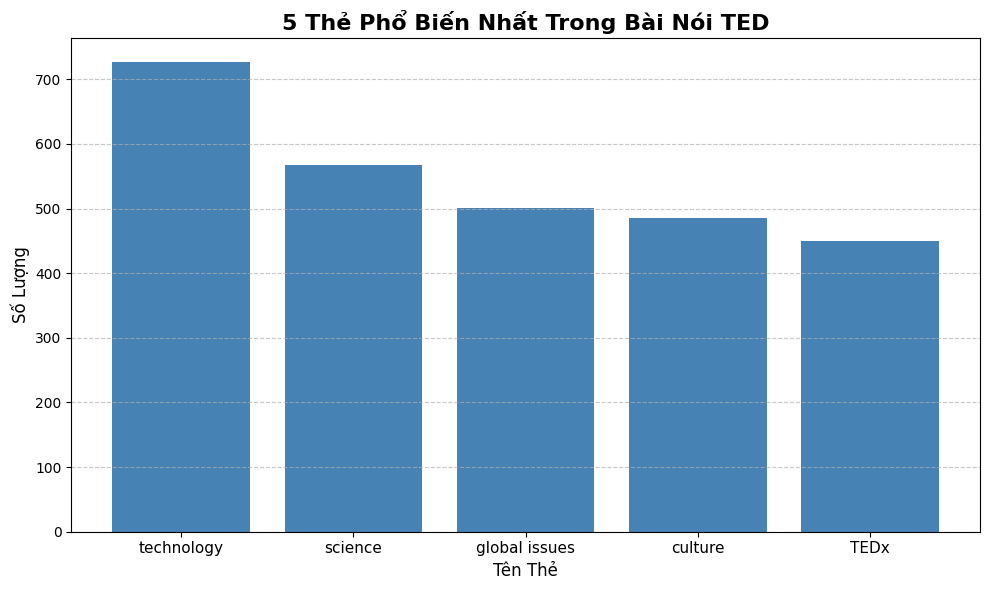

5 thẻ phổ biến nhất:
technology: 727
science: 567
global issues: 501
culture: 486
TEDx: 450


In [ ]:

all_tags = ted_main_df["tags"].apply(ast.literal_eval)
tag_counts = Counter(tag for tags in all_tags for tag in tags)
top_5_tags = tag_counts.most_common(5)
tags, counts = zip(*top_5_tags)

plt.figure(figsize=(10, 6))
bars = plt.bar(tags, counts, color='steelblue')

plt.title('5 Thẻ Phổ Biến Nhất Trong Bài Nói TED', fontsize=16, fontweight='bold')
plt.xlabel('Tên Thẻ', fontsize=12)
plt.ylabel('Số Lượng', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("5 thẻ phổ biến nhất:")
for tag, count in top_5_tags:
    print(f"{tag}: {count:,}")